In [6]:
#importing the necessary libraries for processing

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import random
random.seed(2)

In [7]:
#setting up the training and test data directory

train_data_dir = r'C:/Users/borha/Dataset/Training'
validation_data_dir = r'C:/Users/borha/Dataset/Test'

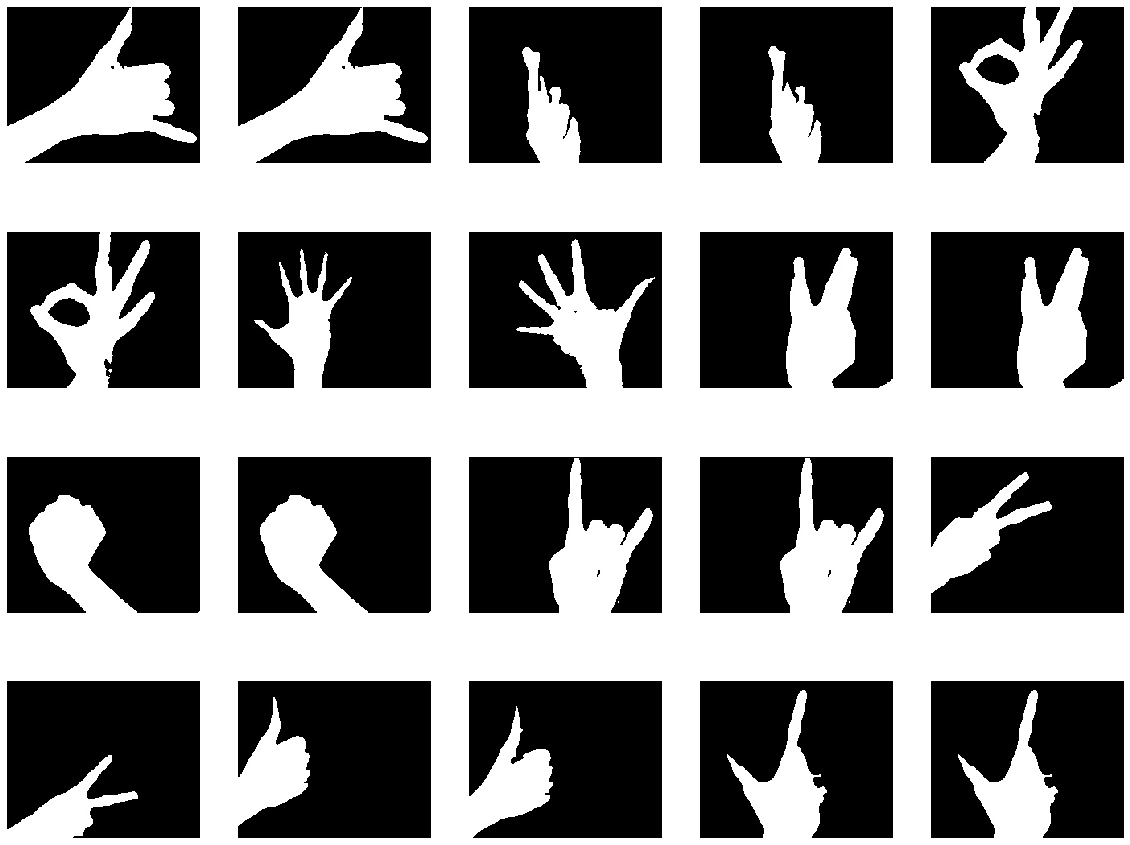

In [8]:
#show random images from train folder

import random
from PIL import Image
import os
import matplotlib.pyplot as plt

path = os.getcwd()+'\\'+'Dataset/Training'
dirs = os.listdir(path)
image_random_number = 2
plt.figure(1, figsize=(20, 20))
plt.axis('off')
n = 0
for folder in os.listdir(path):
    image_lists = os.listdir(path+'\\'+folder)
    for i in range(image_random_number):
        n += 1
        index = random.randint(1,image_random_number)
        image = image_lists[index]
        img = os.path.join(path,folder,image)
        im = Image.open(img)
        plt.subplot(5, 5, n)
        plt.axis('off')
        plt.imshow(im,cmap='gray')
plt.show()

In [9]:
num_classes = 10 # number of classes of the dataset contains images of 10 different hand gestures
img_rows, img_cols = 50, 50 # define the image size 50x50
batch_size = 16 #define batch size

In [10]:
#  data augmentaiton 
#Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data

#creating a data generator
train_datagen = ImageDataGenerator(
      rescale=1./255, # normalize the image to 0-1 range
      rotation_range=30, #rotate image upto 30 degree to rotated image
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 3696 images belonging to 10 classes.
Found 1547 images belonging to 10 classes.


In [11]:
#define the Custom CNN model
model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3))) #filter size 3x3 and num of filters 32
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #add maxpooling layer of size 2x2 to reduce the feature map size
model.add(Dropout(0.25)) #drop 25% of neuron randomly 

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes)) #define output layer which has same number of node as number of classes 
model.add(Activation('softmax')) #softmax activation function to generate output

#print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [12]:

from keras.optimizers import RMSprop #import optimizer
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("/CNN/Hand_gestures_cnn_1.h5", #save best model weight 
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]


# We use a very small learning rate of 0.001
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001), 
              metrics = ['accuracy'])

#set number of train and test sample as we have 3696 images in train folder
#and 1547 images for test

nb_train_samples = 3696 
nb_validation_samples = 1547

#set epoches for the network
epochs = 5

#fit the model using dataaset

history_CNN = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

D:\ProgramData\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
D:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
231/231 [==============================] - 41s 130ms/step - loss: 2.2455 - accuracy: 0.1998 - val_loss: 1.1400 - val_accuracy: 0.6120

Epoch 00001: val_loss improved from inf to 1.13999, saving model to /CNN\Hand_gestures_cnn_1.h5
Epoch 2/5
231/231 [==============================] - 29s 127ms/step - loss: 1.4243 - accuracy: 0.4781 - val_loss: 0.6275 - val_accuracy: 0.7741

Epoch 00002: val_loss improved from 1.13999 to 0.62748, saving model to /CNN\Hand_gestures_cnn_1.h5
Epoch 3/5
231/231 [==============================] - 30s 128ms/step - loss: 1.0401 - accuracy: 0.6361 - val_loss: 0.4606 - val_accuracy: 0.8503

Epoch 00003: val_loss improved from 0.62748 to 0.46063, saving model to /CNN\Hand_gestures_cnn_1.h5
Epoch 4/5
231/231 [==============================] - 30s 129ms/step - loss: 0.7934 - accuracy: 0.7252 - val_loss: 0.2881 - val_accuracy: 0.9167

Epoch 00004: val_loss improved from 0.46063 to 0.28806, saving model to /CNN\Hand_gestures_cnn_1.h5
Epoch 5/5
231/231 [=====

In [31]:
#classification report for Custom CNN



from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred_CNN = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred_CNN = np.argmax(Y_pred_CNN, axis=1)
print('\n----------------Confusion Matrix-----------------\n')
print(confusion_matrix(validation_generator.classes, y_pred_CNN))
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
# Get the names of the ten classes
#class_names = list(class_labels.values())
target_names = list(class_labels.values())
print('\n------------- Classification report: Custom CNN --------------------\n')
print(classification_report(validation_generator.classes, y_pred_CNN, target_names=target_names))


----------------Confusion Matrix-----------------

[[165   0   0   0   0   0   0   0   2   0]
 [  0 155   0   0   1   0   6   3   0   3]
 [  0   0 112  31   0   0   0   0   0   1]
 [  0   0   0 143   3   0   0   2   0   0]
 [  0   0   0   1 158   0   0   2   0   0]
 [  0   0   0   0   0 135   0   0   1   0]
 [  0   0   0   0   0   0 158   0   0   1]
 [  0   0   0   1   1   0   2 113   0  31]
 [  0   6   0   0   0   0   1   0 163   1]
 [  0   0   0   0   0   0   2   0   3 140]]

------------- Classification report: Custom CNN --------------------

                 precision    recall  f1-score   support

        call_me       1.00      0.99      0.99       167
fingers_crossed       0.96      0.92      0.94       168
           okay       1.00      0.78      0.88       144
          paper       0.81      0.97      0.88       148
          peace       0.97      0.98      0.98       161
           rock       1.00      0.99      1.00       136
        rock_on       0.93      0.99      0.96

In [14]:
true_classes = validation_generator.classes #get true class labels for the test data
class_indices = train_generator.class_indices #and class indices too
class_indices = dict((v,k) for k,v in class_indices.items())

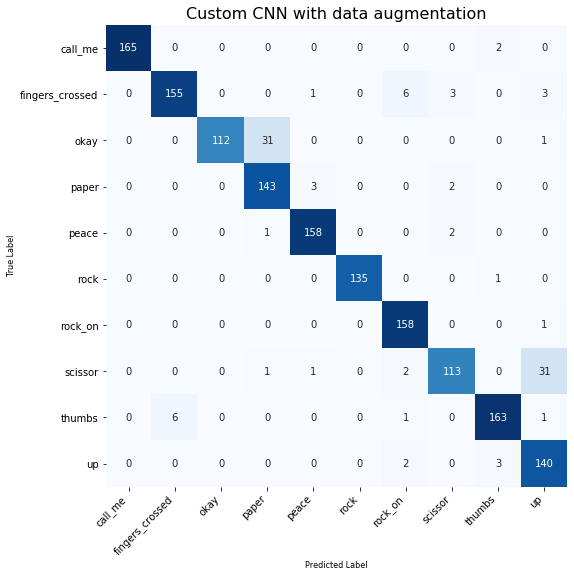

In [16]:
#show the confusion matrix graphically for custom CNN


import seaborn as sns
from sklearn.metrics import confusion_matrix


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
# Get the names of the ten classes
class_names_CNN = list(class_labels.values())

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=8)
    ax.set_xlabel('Predicted Label', fontsize=8)

fig, (ax1) = plt.subplots(1, 1, figsize=(8, 8))

plot_heatmap(true_classes, y_pred_CNN, class_names_CNN, ax1, title="Custom CNN with data augmentation")    
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()

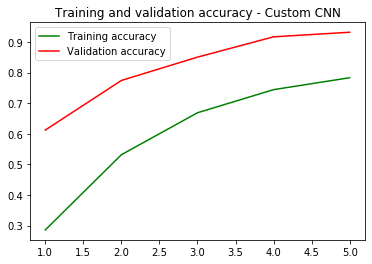

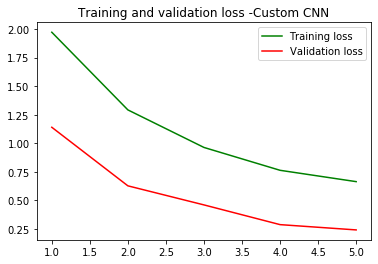

In [17]:
#plot accuracy and loss for custom CNN

import matplotlib.pyplot as plt

acc = history_CNN.history['accuracy']
val_acc = history_CNN.history['val_accuracy']
loss = history_CNN.history['loss']
val_loss = history_CNN.history['val_loss']

epochs = range(1, len(acc)+1)

#plot the train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy - Custom CNN')
plt.legend()

plt.figure()

#plot the train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss -Custom CNN')
plt.legend()

plt.show()

In [18]:
import os
import re
from os import listdir
from os.path import isfile, join
import cv2

from keras.models import load_model
from keras.preprocessing import image


#this function draw the predicted and actual labels on the image 
def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

#function to select image randomly for prediction
def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

In [19]:
#randomly choose image from test images and show predicted and actual lebels

import numpy as np
# dimensions of our images
img_width, img_height = 50, 50


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 5):
    path = './Dataset/Test/' 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

D:\ProgramData\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## VGG16 pretrained model start here 

In [ ]:
## Pretraind VGG16 without feature extraction

In [20]:

# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential

from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')

In [21]:

import keras
from keras.applications.vgg16 import VGG16
# load the pretrained VGG16 network 
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=(img_rows, img_cols, 3))
model_vgg.summary()

[INFO loading network...
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 

In [22]:
# Freeze all the layers except the last 3 layers
for layer in model_vgg.layers[:-3]:
    layer.trainable = False
    
# show the layers
for layer in model_vgg.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000022D6B8EF048> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6B906AC8> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6B66E2B0> False
<keras.layers.pooling.MaxPooling2D object at 0x0000022D6EEDDBE0> False
<keras.layers.convolutional.Conv2D object at 0x0000022D5F5431D0> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6EF0A978> False
<keras.layers.pooling.MaxPooling2D object at 0x0000022D5F543358> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6F010400> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6F017B38> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6F01DF98> False
<keras.layers.pooling.MaxPooling2D object at 0x0000022D6F010DD8> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6F024240> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6F029630> False
<keras.layers.convolutional.Conv2D object at 0x0000022D6F0244A8> False
<ker

In [23]:
from keras.utils import np_utils
from keras.models import Sequential

from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D
 
import warnings
warnings.filterwarnings('ignore')

In [24]:
#construct the head of the model that will be placed on top of the
# the vgg16 base model

model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dense(512, activation='relu'))
model_transfer_full.add(Dropout(0.5))
model_transfer_full.add(Dense(10, activation='softmax'))
model_transfer_full.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 14,982,474
Trainable params: 4,987,402
Non-trainable params: 9,995,072
_________________________________________________________________


In [25]:
# Creating a checkpointer 

checkpoint = ModelCheckpoint("/CNN/Hand_gestures_cnn_vgg16.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)



earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [26]:
image_size = img_rows
# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 16
val_batchsize = 16

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 3696 images belonging to 10 classes.
Found 1547 images belonging to 10 classes.


In [27]:
model_transfer_full.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

In [28]:
nb_train_samples = 3696
nb_validation_samples =1547
epochs = 5


history_vgg16 = model_transfer_full.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples //16, # batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // 16) #batch_size)
# Use pretrained VGG16 model to train without fine tuning

Epoch 1/5
231/231 [==============================] - 45s 187ms/step - loss: 2.1438 - accuracy: 0.2419 - val_loss: 1.1638 - val_accuracy: 0.8535

Epoch 00001: val_loss improved from inf to 1.16383, saving model to /CNN\Hand_gestures_cnn_vgg16.h5
Epoch 2/5
231/231 [==============================] - 42s 180ms/step - loss: 1.0478 - accuracy: 0.7394 - val_loss: 0.5820 - val_accuracy: 0.9434

Epoch 00002: val_loss improved from 1.16383 to 0.58197, saving model to /CNN\Hand_gestures_cnn_vgg16.h5
Epoch 3/5
231/231 [==============================] - 42s 180ms/step - loss: 0.5746 - accuracy: 0.8636 - val_loss: 0.3630 - val_accuracy: 0.9453

Epoch 00003: val_loss improved from 0.58197 to 0.36300, saving model to /CNN\Hand_gestures_cnn_vgg16.h5
Epoch 4/5
231/231 [==============================] - 41s 179ms/step - loss: 0.3754 - accuracy: 0.9199 - val_loss: 0.2545 - val_accuracy: 0.9603

Epoch 00004: val_loss improved from 0.36300 to 0.25451, saving model to /CNN\Hand_gestures_cnn_vgg16.h5
Epoch 5/

In [33]:

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred_vgg16 = model_transfer_full.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred_vgg16 = np.argmax(Y_pred_vgg16, axis=1)
print('\n--------------Confusion Matrix----------------------\n')
print(confusion_matrix(validation_generator.classes, y_pred_vgg16))

class_labels = validation_generator.class_indices
class_labels_vgg16 = {v: k for k, v in class_labels.items()}
# Get the names of the ten classes
#class_names = list(class_labels.values())
target_names = list(class_labels_vgg16.values())
print('\n------------- Classification report: Pretrained VGG16 with data augmentation --------------------\n')
print(classification_report(validation_generator.classes, y_pred_vgg16, target_names=target_names))


--------------Confusion Matrix----------------------

[[164   0   0   0   0   0   0   3   0   0]
 [  0 155   0   0  13   0   0   0   0   0]
 [  0   0 142   2   0   0   0   0   0   0]
 [  0   0   1 139   4   0   0   4   0   0]
 [  0   0   0   0 161   0   0   0   0   0]
 [  2   1   0   0   1 129   0   3   0   0]
 [  0   0   0   0   7   0 152   0   0   0]
 [  8   0   0   0   0   0   2 137   0   1]
 [  1   5   0   0   0   0   0   0 165   0]
 [  0   3   0   0   0   0   0   0   2 140]]

------------- Classification report: Pretrained VGG16 with data augmentation --------------------

                 precision    recall  f1-score   support

        call_me       0.94      0.98      0.96       167
fingers_crossed       0.95      0.92      0.93       168
           okay       0.99      0.99      0.99       144
          paper       0.99      0.94      0.96       148
          peace       0.87      1.00      0.93       161
           rock       1.00      0.95      0.97       136
        rock_o

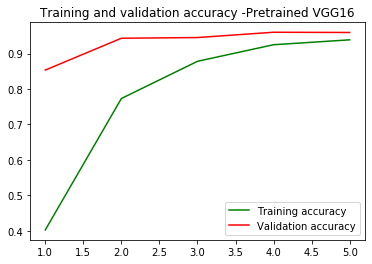

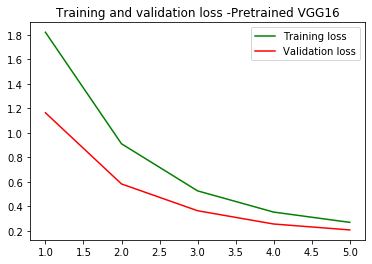

In [34]:
#plot loss and accuracy

import matplotlib.pyplot as plt

acc = history_vgg16.history['accuracy']
val_acc = history_vgg16.history['val_accuracy']
loss = history_vgg16.history['loss']
val_loss = history_vgg16.history['val_loss']

epochs = range(1, len(acc)+1)

#plot the train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy -Pretrained VGG16')
plt.legend()

plt.figure()

#plot the train and validation loss
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss -Pretrained VGG16')
plt.legend()

plt.show()

## VGG16 as a feature extractor

In [35]:
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [36]:
import os
train_dir = '/Users/borha/Dataset/Training/' 
test_dir = '/Users/borha/Dataset/Test/' 
img_width, img_height = 32,32

In [37]:
# Instantiate convolutional base for use VGG16 as a feature extractor
import keras 
from keras.applications.vgg16 import VGG16 

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3)) 

In [38]:
# Check architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [39]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 16

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 1, 1, 512)) #this must be same as output of last laayer of VGG16
    labels = np.zeros(shape=(sample_count, 10)) 
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(img_width, img_height), 
        batch_size=batch_size, 
        class_mode='categorical')
    i=0
    print ("before for loop")
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #extract features for each images using vgg16
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [40]:
#extract feature from train and test data using pretrained vgg16 model
train_features, train_labels = extract_features(train_dir, 3696)  
test_features, test_labels = extract_features(test_dir, 1547)

Found 3696 images belonging to 10 classes.
before for loop
Found 1547 images belonging to 10 classes.
before for loop


In [41]:
# Define model
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D



model_new = models.Sequential()
model_new.add(layers.GlobalAveragePooling2D(input_shape=(1,1,512)))
model_new.add(Dense(1024, activation='relu')) # add first dense layer with 1024 nodes
model_new.add(Dense(512, activation='relu'))  #add second dense layer with 512 nodes
model_new.add(Dropout(0.25))
model_new.add(layers.Dense(10, activation='softmax'))
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,055,242
Trainable params: 1,055,242
Non-trainable params: 0
_________________________________________________________________


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam


checkpoint = ModelCheckpoint("/CNN/Hand_gestures_cnn_2.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

model_new.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

epochs = 5
# Train model
history_pre = model_new.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(test_features, test_labels))

Epoch 1/5
231/231 [==============================] - 2s 8ms/step - loss: 0.9938 - acc: 0.6595 - val_loss: 0.3211 - val_acc: 0.8946

Epoch 00001: val_loss improved from inf to 0.32114, saving model to /CNN\Hand_gestures_cnn_2.h5
Epoch 2/5
231/231 [==============================] - 2s 7ms/step - loss: 0.1903 - acc: 0.9409 - val_loss: 0.1836 - val_acc: 0.9483

Epoch 00002: val_loss improved from 0.32114 to 0.18359, saving model to /CNN\Hand_gestures_cnn_2.h5
Epoch 3/5
231/231 [==============================] - 2s 7ms/step - loss: 0.1172 - acc: 0.9571 - val_loss: 0.1978 - val_acc: 0.9367

Epoch 00003: val_loss did not improve from 0.18359
Epoch 4/5
231/231 [==============================] - 2s 7ms/step - loss: 0.0842 - acc: 0.9742 - val_loss: 0.3301 - val_acc: 0.9121

Epoch 00004: val_loss did not improve from 0.18359
Epoch 5/5
231/231 [==============================] - 2s 8ms/step - loss: 0.0863 - acc: 0.9707 - val_loss: 0.1775 - val_acc: 0.9489

Epoch 00005: val_loss improved from 0.1835

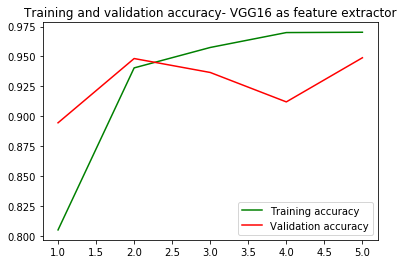

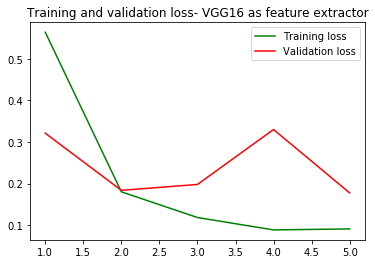

In [43]:
import matplotlib.pyplot as plt

acc = history_pre.history['acc']
val_acc = history_pre.history['val_acc']
loss = history_pre.history['loss']
val_loss = history_pre.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy- VGG16 as feature extractor')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss- VGG16 as feature extractor')
plt.legend()

plt.show()

In [44]:
vgg_preds = model_new.predict_classes(test_features)
vgg_true_class = test_labels.argmax(1)

In [45]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
con_mat = tf.math.confusion_matrix(test_labels.argmax(1), vgg_preds)
con_mat = np.array(con_mat)
print('Confusion matrix for VGG16 as a feature extractor')
print(con_mat)

Confusion matrix for VGG16 as a feature extractor
[[164   0   1   0   0   0   0   2   0   0]
 [  0 167   0   0   0   0   1   0   0   0]
 [  0   0 138   6   0   0   0   0   0   0]
 [  0   0   7 136   0   0   0   5   0   0]
 [  0  10   0   0 146   3   0   2   0   0]
 [  1   0   0   0   0 130   0   4   1   0]
 [  0   1   0   0   1   0 155   2   0   0]
 [  8   1   4   3   0   0   0 131   0   1]
 [  7   2   0   0   0   1   0   0 159   2]
 [  1   2   0   0   0   0   0   0   0 142]]


In [47]:
#classification report for VGG16 network when used as feature extractor
vgg_pred_class = model_new.predict_classes(test_features)
vgg_true_class = test_labels.argmax(1)
print('\n---------Classification report for VGG16 as a feature extractor---------\n')
classes_out = ['call_me', 'finger_crossed', 'okay', 'paper', 'peace','rock','rock_on','scissor','thumbs','up']
print(classification_report(vgg_true_class, vgg_pred_class , target_names=classes_out))


---------Classification report for VGG16 as a feature extractor---------

                precision    recall  f1-score   support

       call_me       0.91      0.98      0.94       167
finger_crossed       0.91      0.99      0.95       168
          okay       0.92      0.96      0.94       144
         paper       0.94      0.92      0.93       148
         peace       0.99      0.91      0.95       161
          rock       0.97      0.96      0.96       136
       rock_on       0.99      0.97      0.98       159
       scissor       0.90      0.89      0.89       148
        thumbs       0.99      0.93      0.96       171
            up       0.98      0.98      0.98       145

      accuracy                           0.95      1547
     macro avg       0.95      0.95      0.95      1547
  weighted avg       0.95      0.95      0.95      1547



## Model comparision

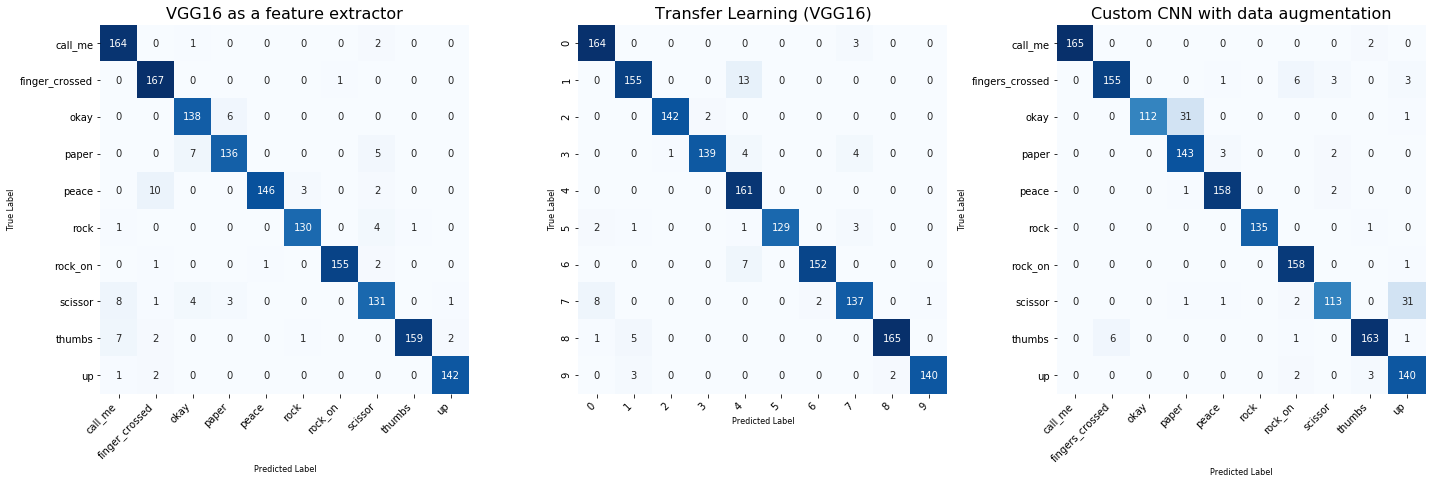

In [49]:
import seaborn as sns

def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm, 
        annot=True, 
        square=True, 
        xticklabels=class_names, 
        yticklabels=class_names,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=8)
    ax.set_xlabel('Predicted Label', fontsize=8)

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 10))

classes_out = ['call_me', 'finger_crossed', 'okay', 'paper', 'peace','rock','rock_on','scissor','thumbs','up']

vgg_pred_class = model_new.predict_classes(test_features)
vgg_true_class = test_labels.argmax(1)
true_classes = validation_generator.classes

plot_heatmap(vgg_true_class, vgg_pred_class, classes_out, ax1, title="VGG16 as a feature extractor")    
plot_heatmap(true_classes, y_pred_vgg16, class_labels_vgg16, ax2, title="Transfer Learning (VGG16)")    
plot_heatmap(true_classes, y_pred_CNN, class_names_CNN, ax3, title="Custom CNN with data augmentation")    

#fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)
fig.tight_layout()
fig.subplots_adjust(top=1.25)
plt.show()